In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [6]:
df['Day']=df['Timestamp'].dt.day


In [7]:
df['Month']=df['Timestamp'].dt.month


In [8]:
df['Year']=df['Timestamp'].dt.year


In [9]:
df['Time'] = df['Timestamp'].dt.time


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Day                       1000 non-null   int64         
 11  Month                     1000 non-null   int64         
 12  Year                 

In [11]:
df["Time"].unique().tolist()

[datetime.time(0, 53, 11),
 datetime.time(1, 39, 2),
 datetime.time(20, 35, 42),
 datetime.time(2, 31, 19),
 datetime.time(3, 36, 18),
 datetime.time(14, 30, 17),
 datetime.time(20, 59, 32),
 datetime.time(1, 40, 15),
 datetime.time(9, 33, 42),
 datetime.time(1, 42, 51),
 datetime.time(20, 19, 1),
 datetime.time(8, 10, 10),
 datetime.time(1, 14, 41),
 datetime.time(21, 49, 22),
 datetime.time(9, 31, 49),
 datetime.time(3, 41, 30),
 datetime.time(19, 20, 41),
 datetime.time(7, 0, 58),
 datetime.time(7, 53, 55),
 datetime.time(4, 43, 7),
 datetime.time(7, 52, 48),
 datetime.time(13, 22, 35),
 datetime.time(8, 49, 33),
 datetime.time(9, 43, 43),
 datetime.time(17, 27, 9),
 datetime.time(15, 25, 52),
 datetime.time(10, 46, 14),
 datetime.time(8, 32, 10),
 datetime.time(5, 8, 35),
 datetime.time(12, 38, 16),
 datetime.time(20, 23, 15),
 datetime.time(22, 13, 37),
 datetime.time(5, 5, 14),
 datetime.time(14, 0, 9),
 datetime.time(3, 12, 25),
 datetime.time(3, 26, 39),
 datetime.time(15, 18, 

In [12]:
df['Time'] = df['Time'].astype(str)


In [13]:
df['Time'] = df['Time'].str.split('(').str[0]


In [14]:
df["Time"].unique().tolist()

['00:53:11',
 '01:39:02',
 '20:35:42',
 '02:31:19',
 '03:36:18',
 '14:30:17',
 '20:59:32',
 '01:40:15',
 '09:33:42',
 '01:42:51',
 '20:19:01',
 '08:10:10',
 '01:14:41',
 '21:49:22',
 '09:31:49',
 '03:41:30',
 '19:20:41',
 '07:00:58',
 '07:53:55',
 '04:43:07',
 '07:52:48',
 '13:22:35',
 '08:49:33',
 '09:43:43',
 '17:27:09',
 '15:25:52',
 '10:46:14',
 '08:32:10',
 '05:08:35',
 '12:38:16',
 '20:23:15',
 '22:13:37',
 '05:05:14',
 '14:00:09',
 '03:12:25',
 '03:26:39',
 '15:18:10',
 '05:28:18',
 '17:11:49',
 '06:49:10',
 '09:27:58',
 '11:53:43',
 '15:38:46',
 '00:23:38',
 '13:26:22',
 '13:16:33',
 '22:46:43',
 '18:54:01',
 '09:32:26',
 '11:01:54',
 '07:07:46',
 '21:19:58',
 '09:31:36',
 '04:57:51',
 '07:36:58',
 '03:56:16',
 '11:42:00',
 '00:13:47',
 '17:05:15',
 '22:49:47',
 '08:07:13',
 '05:30:13',
 '14:45:33',
 '20:55:22',
 '00:55:23',
 '23:36:03',
 '00:17:27',
 '22:11:34',
 '11:35:01',
 '20:10:22',
 '09:00:55',
 '13:37:34',
 '00:37:54',
 '17:39:06',
 '11:24:21',
 '16:21:05',
 '04:18:46',

In [15]:
df['Time'] = pd.to_datetime(df['Time'])


In [16]:
df["Hour"]=df["Time"].dt.hour


In [17]:
df['Minutes'] = df['Time'].dt.minute


In [18]:
df['Seconds'] = df['Time'].dt.second


In [19]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Day,Month,Year,Time,Hour,Minutes,Seconds
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,27,3,2016,2023-09-28 00:53:11,0,53,11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,4,2016,2023-09-28 01:39:02,1,39,2
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,13,3,2016,2023-09-28 20:35:42,20,35,42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,10,1,2016,2023-09-28 02:31:19,2,31,19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,6,2016,2023-09-28 03:36:18,3,36,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,11,2,2016,2023-09-28 21:49:00,21,49,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,22,4,2016,2023-09-28 02:07:01,2,7,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,1,2,2016,2023-09-28 17:24:57,17,24,57
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,24,3,2016,2023-09-28 02:35:54,2,35,54


In [20]:
df.drop("Timestamp",axis=1,inplace=True)

In [21]:
df.drop("Time",axis=1,inplace=True)

In [22]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Day,Month,Year,Hour,Minutes,Seconds
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,27,3,2016,0,53,11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,2016,1,39,2
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,13,3,2016,20,35,42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,1,2016,2,31,19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,6,2016,3,36,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1,11,2,2016,21,49,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1,22,4,2016,2,7,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1,1,2,2016,17,24,57
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0,24,3,2016,2,35,54


In [23]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Day,Month,Year,Hour,Minutes,Seconds
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,15.484000,3.817000,2016.0,11.660000,29.054000,29.796000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,8.734073,1.926973,0.0,6.960952,17.249134,16.890402
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,1.000000,1.000000,2016.0,0.000000,0.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,8.000000,2.000000,2016.0,6.000000,14.000000,15.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,15.000000,4.000000,2016.0,12.000000,30.000000,30.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,23.000000,5.000000,2016.0,18.000000,43.000000,44.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,31.000000,7.000000,2016.0,23.000000,59.000000,59.000000


In [24]:
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(map_months)

In [25]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Day,Month,Year,Hour,Minutes,Seconds,Season
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,27,3,2016,0,53,11,Spring
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,2016,1,39,2,Spring
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,13,3,2016,20,35,42,Spring
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,1,2016,2,31,19,Winter
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,6,2016,3,36,18,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1,11,2,2016,21,49,0,Winter
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1,22,4,2016,2,7,1,Spring
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1,1,2,2016,17,24,57,Winter
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0,24,3,2016,2,35,54,Spring


In [26]:
df["Month"].unique().tolist()

[3, 4, 1, 6, 5, 7, 2]

<AxesSubplot:xlabel='City', ylabel='count'>

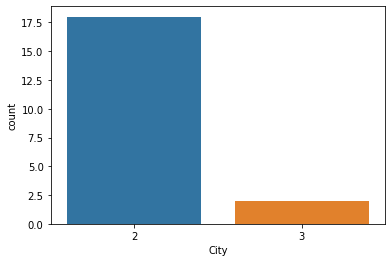

In [27]:
y=df["City"].value_counts().head(20)
sns.countplot(x=y)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

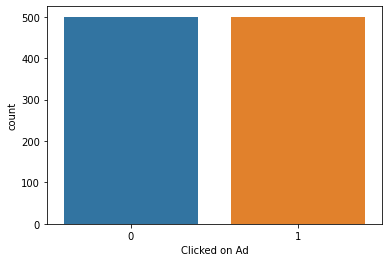

In [28]:
sns.countplot(x="Clicked on Ad", data=df)


In [29]:
k= df.groupby("City")["Clicked on Ad"].count().reset_index()
l= k.sort_values("Clicked on Ad", ascending=False)
l

,City,Clicked on Ad
426,Lisamouth,3
955,Williamsport,3
306,Johnstad,2
528,New Sheila,2
30,Benjaminchester,2
...,...,...
327,Karenton,1
328,Katieport,1
329,Kaylashire,1
330,Keithtown,1


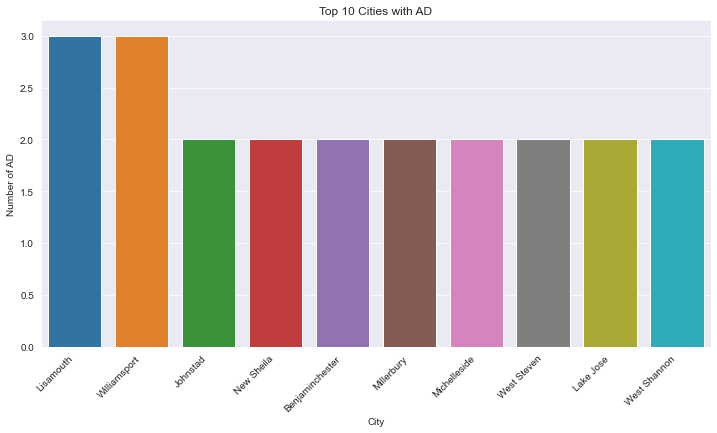

In [30]:
g= df.groupby("City")["Clicked on Ad"].count().reset_index()
s= g.sort_values("Clicked on Ad", ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="City", y="Clicked on Ad", data=s.head(10))
plt.title("Top 10 Cities with AD")
plt.xlabel("City")
plt.ylabel("Number of AD")
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
g= df.groupby("City")["Clicked on Ad"].sum().reset_index()
s= g.sort_values("Clicked on Ad", ascending=False)
s

,City,Clicked on Ad
366,Lake David,2
732,Robertfurt,2
426,Lisamouth,2
804,South Lisa,2
955,Williamsport,2
...,...,...
203,Estradafurt,0
559,North Brandon,0
205,Evansfurt,0
557,North Anna,0


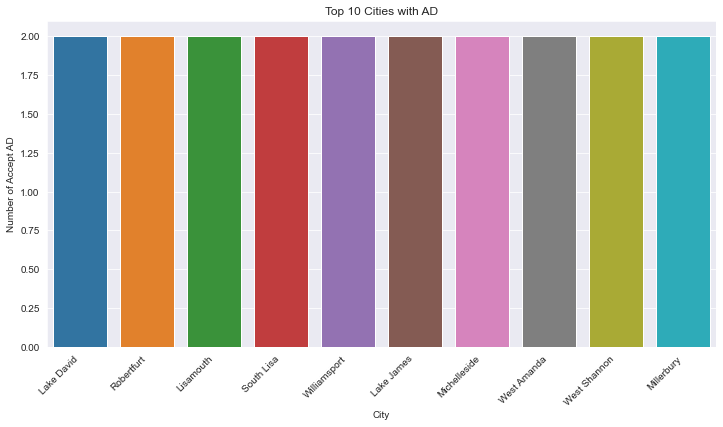

In [32]:
g= df.groupby("City")["Clicked on Ad"].sum().reset_index()
s= g.sort_values("Clicked on Ad", ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="City", y="Clicked on Ad", data=s.head(10))
plt.title("Top 10 Cities with AD")
plt.xlabel("City")
plt.ylabel("Number of Accept AD")
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
df[df["City"]=="Lake David"]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Day,Month,Year,Hour,Minutes,Seconds,Season
266,70.58,26,56694.12,136.94,Proactive next generation knowledge user,Lake David,0,Algeria,1,26,2,2016,9,18,48,Winter
733,44.11,41,43111.41,121.24,Organic next generation matrix,Lake David,1,Saint Vincent and the Grenadines,1,20,4,2016,16,49,15,Spring


In [34]:
import plotly.express as px 
px.histogram(df,x="Season",hover_data=df.columns,color="Season")


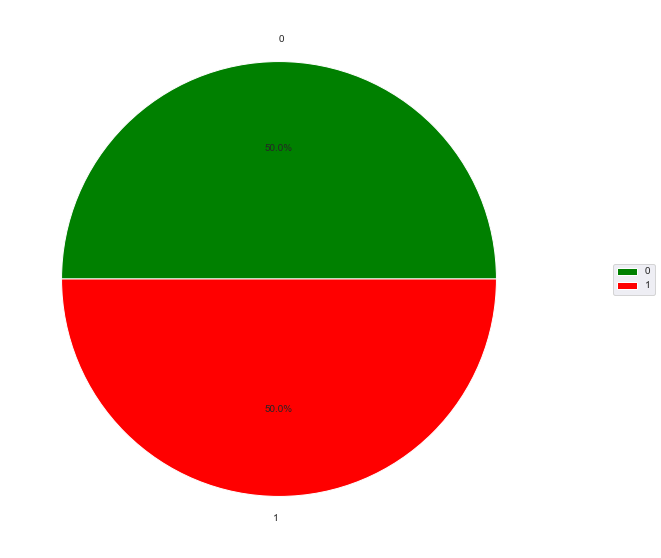

In [35]:
labels=df["Clicked on Ad"].value_counts().index.values
sizes=df["Clicked on Ad"].value_counts().values
colors=["green","red"]
plt.figure(figsize=(10,10))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.legend(labels,loc="center right",bbox_to_anchor=(1.2,0.5))

In [36]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Day,Month,Year,Hour,Minutes,Seconds,Season
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,27,3,2016,0,53,11,Spring
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,2016,1,39,2,Spring
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,13,3,2016,20,35,42,Spring
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,1,2016,2,31,19,Winter
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,6,2016,3,36,18,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1,11,2,2016,21,49,0,Winter
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1,22,4,2016,2,7,1,Spring
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1,1,2,2016,17,24,57,Winter
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0,24,3,2016,2,35,54,Spring


In [37]:
##اعلي معدل اعمار بيتقدمله اعلانات
k= df.groupby("Age")["Clicked on Ad"].count().reset_index()
a= k.sort_values("Clicked on Ad", ascending=False)
a

,Age,Clicked on Ad
12,31,60
17,36,50
9,28,48
10,29,48
14,33,43
16,35,39
15,34,39
11,30,39
13,32,38
19,38,37


In [38]:
##اعلي معدل اعمار بيقبل اعلانات
k= df.groupby("Age")["Clicked on Ad"].sum().reset_index()
a= k.sort_values("Clicked on Ad", ascending=False)
a

,Age,Clicked on Ad
26,45,27
19,38,25
17,36,25
22,41,22
23,42,20
31,50,19
24,43,19
21,40,19
30,49,17
20,39,17


In [39]:
##اعلي 10 معدل دخب وهل قبل الاعلان ام لا
k= df.groupby("Area Income")["Clicked on Ad"].sum().reset_index()
a= k.sort_values("Area Income", ascending=False)
a.head(10)

,Area Income,Clicked on Ad
999,79484.80,0
998,79332.33,0
997,78520.99,1
996,78119.50,0
995,78092.95,0
994,77988.71,0
993,77871.75,0
992,77567.85,0
991,77460.07,0
990,77220.42,0


In [40]:
##اقل 10 معدل دخب وهل قبل الاعلان ام لا
a.tail(10)

,Area Income,Clicked on Ad
9,19991.72,1
8,19345.36,1
7,18819.34,1
6,18368.57,1
5,17709.98,1
4,15879.10,1
3,15598.29,1
2,14775.50,1
1,14548.06,1
0,13996.50,1


In [41]:
a.tail(20)

,Area Income,Clicked on Ad
19,23936.86,1
18,23821.72,1
17,23410.75,1
16,22473.08,1
15,22456.04,1
14,22205.74,1
13,21773.22,1
12,21644.91,1
11,20856.54,1
10,20592.99,1


In [42]:
##اعلي 10 معدل استخدام للانترنت يوميا وحالتهم من قبول الاعلانات ام لا
k= df.groupby("Daily Internet Usage")["Clicked on Ad"].sum().reset_index()
a= k.sort_values("Daily Internet Usage", ascending=False)
a.head(10)

,Daily Internet Usage,Clicked on Ad
965,269.96,1
964,267.01,0
963,261.52,0
962,261.02,0
961,259.76,0
960,258.62,1
959,258.26,0
958,258.06,0
957,256.40,0
956,256.39,0


In [43]:
##اقل 10 معدل استخدام للانترنت يوميا وحالتهم من قبول الاعلانات ام لا

a.tail(10)

,Daily Internet Usage,Clicked on Ad
9,105.94,1
8,105.86,1
7,105.71,1
6,105.69,1
5,105.63,1
4,105.22,1
3,105.15,1
2,105.04,1
1,105.00,1
0,104.78,1


In [44]:
## top Daily Time Spent on Site	
k= df.groupby("Daily Time Spent on Site")["Clicked on Ad"].sum().reset_index()
a= k.sort_values("Daily Time Spent on Site", ascending=False)
a.head(10)

,Daily Time Spent on Site,Clicked on Ad
899,91.43,0
898,91.37,1
897,91.15,0
896,91.10,0
895,90.97,0
894,90.75,0
893,89.91,0
892,89.80,0
891,89.71,0
890,89.66,0


In [45]:
##lowest Daily Time Spent on Site	
a.tail(10)

,Daily Time Spent on Site,Clicked on Ad
9,34.66,1
8,34.30,1
7,34.04,1
6,33.52,1
5,33.33,1
4,33.21,1
3,32.99,1
2,32.91,1
1,32.84,1
0,32.60,2


In [46]:
df[df["Age"]==45]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Day,Month,Year,Hour,Minutes,Seconds,Season
52,33.33,45,53350.11,193.58,Pre-emptive value-added workforce,East Samanthashire,1,Guinea-Bissau,1,17,1,2016,9,31,36,Winter
64,45.96,45,66281.46,141.22,Streamlined cohesive conglomeration,Robertfurt,0,Christmas Island,1,3,6,2016,0,55,23,Summer
79,55.13,45,55605.92,111.71,Customizable executive software,Lake Conniefurt,0,Ukraine,1,17,2,2016,21,55,29,Winter
119,88.97,45,49269.98,152.49,Advanced web-enabled standardization,Lake Jessica,0,Bhutan,1,11,6,2016,18,32,12,Summer
127,89.05,45,57868.44,206.98,Polarized bandwidth-monitored moratorium,Stewartbury,0,Falkland Islands (Malvinas),0,3,4,2016,10,7,56,Spring
196,44.78,45,63363.04,137.24,Extended context-sensitive monitoring,West Casey,1,Suriname,1,9,7,2016,11,4,54,Summer
235,40.42,45,40183.75,133.90,Stand-alone reciprocal synergy,Lisamouth,1,Norway,1,16,3,2016,7,59,37,Spring
246,39.96,45,59610.81,146.13,Enhanced homogeneous moderator,East Barbara,1,Guernsey,1,15,4,2016,6,8,35,Spring
251,61.22,45,63883.81,119.03,Streamlined logistical secured line,South Adam,1,Switzerland,1,5,1,2016,9,42,22,Winter
371,36.08,45,41417.27,151.47,Automated client-driven orchestration,Davidside,1,United States Minor Outlying Islands,1,3,7,2016,4,11,40,Summer


In [47]:
df.drop(["Ad Topic Line", "City", "Country","Season"], axis=1, inplace=True)

In [48]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Day,Month,Year,Hour,Minutes,Seconds
0,68.95,35,61833.90,256.09,0,0,27,3,2016,0,53,11
1,80.23,31,68441.85,193.77,1,0,4,4,2016,1,39,2
2,69.47,26,59785.94,236.50,0,0,13,3,2016,20,35,42
3,74.15,29,54806.18,245.89,1,0,10,1,2016,2,31,19
4,68.37,35,73889.99,225.58,0,0,3,6,2016,3,36,18
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,11,2,2016,21,49,0
996,51.30,45,67782.17,134.42,1,1,22,4,2016,2,7,1
997,51.63,51,42415.72,120.37,1,1,1,2,2016,17,24,57
998,55.55,19,41920.79,187.95,0,0,24,3,2016,2,35,54


In [49]:
x=df.drop('Clicked on Ad',axis=1)
y=df['Clicked on Ad']

In [50]:
features=list(x.columns)

In [51]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [52]:
sampler=RandomUnderSampler()

In [53]:
x,y=sampler.fit_resample(x,y)

In [54]:
y.value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [55]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2,random_state=9,stratify=y)

In [56]:
models={'LogisticRegression':LogisticRegression(),
       'KNN':KNeighborsClassifier(n_neighbors=5),
       'SVC':SVC()}

In [57]:
for name,model in models.items():
    print('--------- ',name,'-------------')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('accuracy: ',accuracy_score(y_pred,y_test))
    print('confusion matrix: ',confusion_matrix(y_pred,y_test))
    print('recall score: ',recall_score(y_pred,y_test))
    print('precision score: ',precision_score(y_pred,y_test))
    print('-'*30)

---------  LogisticRegression -------------
accuracy:  0.985
confusion matrix:  [[98  1]
 [ 2 99]]
recall score:  0.9801980198019802
precision score:  0.99
------------------------------
---------  KNN -------------
accuracy:  0.95
confusion matrix:  [[98  8]
 [ 2 92]]
recall score:  0.9787234042553191
precision score:  0.92
------------------------------
---------  SVC -------------
accuracy:  0.97
confusion matrix:  [[98  4]
 [ 2 96]]
recall score:  0.9795918367346939
precision score:  0.96
------------------------------


In [58]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [59]:
features

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male',
 'Day',
 'Month',
 'Year',
 'Hour',
 'Minutes',
 'Seconds']

In [60]:
import joblib

In [61]:
joblib.dump(model,'model.h5')
joblib.dump(features,'features.h5')
joblib.dump(scaler,'scaler.h5')

['scaler.h5']

In [62]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Day,Month,Year,Hour,Minutes,Seconds
0,68.95,35,61833.90,256.09,0,0,27,3,2016,0,53,11
1,80.23,31,68441.85,193.77,1,0,4,4,2016,1,39,2
2,69.47,26,59785.94,236.50,0,0,13,3,2016,20,35,42
3,74.15,29,54806.18,245.89,1,0,10,1,2016,2,31,19
4,68.37,35,73889.99,225.58,0,0,3,6,2016,3,36,18
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,11,2,2016,21,49,0
996,51.30,45,67782.17,134.42,1,1,22,4,2016,2,7,1
997,51.63,51,42415.72,120.37,1,1,1,2,2016,17,24,57
998,55.55,19,41920.79,187.95,0,0,24,3,2016,2,35,54


In [63]:
pred=model.predict(scaler.transform([[69,33,61662.33,300.01,1,1,1,2017,23,15,2]]))
pred[0]

c:\Anaconda\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



0

In [64]:
pred=model.predict(scaler.transform([[68.95,35,61833.90,256.09,0,27,2,2016,0,53,11]]))
pred[0]

c:\Anaconda\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



0

In [65]:
pred=model.predict(scaler.transform([[69,18,11662.33,350.01,1,5,5,2016,23,15,2]]))
pred[0]

c:\Anaconda\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1

# use naive bayes,decision tree,random forest

In [66]:
models={'NB':GaussianNB(),
       'DT':DecisionTreeClassifier(),
       'RF':RandomForestClassifier(n_estimators=20,n_jobs=-1,)}

In [67]:
for name,model in models.items():
    print('--------- ',name,'-------------')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('accuracy_training: ',accuracy_score(y_train,model.predict(x_train)))
    print('accuracy: ',accuracy_score(y_pred,y_test))
    print('confusion matrix: ',confusion_matrix(y_pred,y_test))
    print('recall score: ',recall_score(y_pred,y_test))
    print('precision score: ',precision_score(y_pred,y_test))
    print('-'*30)

---------  NB -------------
accuracy_training:  0.96625
accuracy:  0.98
confusion matrix:  [[97  1]
 [ 3 99]]
recall score:  0.9705882352941176
precision score:  0.99
------------------------------
---------  DT -------------
accuracy_training:  1.0
accuracy:  0.95
confusion matrix:  [[92  2]
 [ 8 98]]
recall score:  0.9245283018867925
precision score:  0.98
------------------------------
---------  RF -------------
accuracy_training:  0.9975
accuracy:  0.96
confusion matrix:  [[94  2]
 [ 6 98]]
recall score:  0.9423076923076923
precision score:  0.98
------------------------------


In [68]:
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [69]:
model=RandomForestClassifier(n_estimators=20,n_jobs=-1)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, n_jobs=-1)

In [70]:
features

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male',
 'Day',
 'Month',
 'Year',
 'Hour',
 'Minutes',
 'Seconds']

In [71]:
joblib.dump(model,'model.h5_RandomForest')
joblib.dump(features,'features.h5_RandomForest')
joblib.dump(scaler,'scaler.h5_RandomForest')

['scaler.h5_RandomForest']

In [72]:
pred=model.predict(scaler.transform([[69,18,11662.33,350.01,1,5,5,2016,23,15,2]]))
pred[0]

0

In [73]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
joblib.dump(model,'model.h5_DecisionTree')
joblib.dump(features,'features.h5_DecisionTree')
joblib.dump(scaler,'scaler.h5_DecisionTree')

['scaler.h5_DecisionTree']

In [75]:
pred=model.predict(scaler.transform([[69,18,11662.33,350.01,1,5,5,2016,23,15,2]]))
pred[0]

1

In [76]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [77]:
joblib.dump(model,'model.h5_GaussianNB')
joblib.dump(features,'features.h5_GaussianNB')
joblib.dump(scaler,'scaler.h5_GaussianNB')

['scaler.h5_GaussianNB']

In [78]:
pred=model.predict(scaler.transform([[69,18,11662.33,350.01,1,5,5,2016,23,15,2]]))
pred[0]

1

# Apply hyperparameter tuning for (svc,decisiontree,randomforest,knn)

In [79]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Day,Month,Year,Hour,Minutes,Seconds
0,68.95,35,61833.90,256.09,0,0,27,3,2016,0,53,11
1,80.23,31,68441.85,193.77,1,0,4,4,2016,1,39,2
2,69.47,26,59785.94,236.50,0,0,13,3,2016,20,35,42
3,74.15,29,54806.18,245.89,1,0,10,1,2016,2,31,19
4,68.37,35,73889.99,225.58,0,0,3,6,2016,3,36,18
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,11,2,2016,21,49,0
996,51.30,45,67782.17,134.42,1,1,22,4,2016,2,7,1
997,51.63,51,42415.72,120.37,1,1,1,2,2016,17,24,57
998,55.55,19,41920.79,187.95,0,0,24,3,2016,2,35,54


In [80]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Day', 'Month', 'Year',
       'Hour', 'Minutes', 'Seconds'],
      dtype='object')

In [82]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV


In [83]:
scaler=StandardScaler()

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [85]:
model=SVC()

In [86]:
from sklearn.pipeline import Pipeline


In [87]:
pip=Pipeline([('scaler',StandardScaler()),('model',SVC())])

In [88]:
pip.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [89]:
pip.score(x_train,y_train)

0.98625

In [90]:
model=SVC()
params = [
        {'C':[1, 10, 100], 'kernel':['linear', 'sigmoid', 'poly']},
        {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.5, 0.6, 0.7, 0.1, 0.01, 0.01]}
         ]
grid_search=GridSearchCV(estimator=model,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=1)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), n_jobs=1,
             param_grid=[{'C': [1, 10, 100],
                          'kernel': ['linear', 'sigmoid', 'poly']},
                         {'C': [1, 10, 100],
                          'gamma': [0.5, 0.6, 0.7, 0.1, 0.01, 0.01],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [91]:
grid_search.best_params_

{'C': 100, 'kernel': 'linear'}

In [92]:
grid_search.best_score_

0.98125

In [93]:
model=grid_search.best_estimator_

In [95]:
model=RandomForestClassifier()
params = [
        {'criterion':['gini', 'entropy'], 'n_estimators':range(20, 500)}
         ]
rand_search=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              scoring='accuracy',
                              n_jobs=1)
rand_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'n_estimators': range(20, 500)}],
                   scoring='accuracy')

In [96]:
rand_search.best_score_

0.9712500000000001

In [97]:
rand_search.best_params_

{'n_estimators': 267, 'criterion': 'gini'}

In [98]:
rand_search.best_estimator_

RandomForestClassifier(n_estimators=267)

In [99]:
model=rand_search.best_estimator_

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1)
grid_search_knn.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [117]:
grid_search_knn.best_score_

0.9625

In [118]:
grid_search_knn.best_estimator_

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

In [119]:
model_Knn=grid_search_knn.best_estimator_

In [121]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1)
grid_search_dt.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [122]:
grid_search_dt.best_score_

0.9550000000000001

In [123]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [124]:
model_dt=grid_search_dt.best_estimator_